# Read a AVIRIS-NG file

In [1]:
import s3fs
import rioxarray
from os import path
import matplotlib.pyplot as plt

In [2]:
# read aviris ng folders
s3 = s3fs.S3FileSystem(anon=False)
avng = s3.ls('bioscape-data/AVNG/')
# print first few
avng[:10]

['bioscape-data/AVNG/',
 'bioscape-data/AVNG/ang20231022t092801',
 'bioscape-data/AVNG/ang20231022t094938',
 'bioscape-data/AVNG/ang20231022t101052',
 'bioscape-data/AVNG/ang20231022t103357',
 'bioscape-data/AVNG/ang20231022t105533',
 'bioscape-data/AVNG/ang20231022t111800',
 'bioscape-data/AVNG/ang20231022t113923',
 'bioscape-data/AVNG/ang20231022t120313',
 'bioscape-data/AVNG/ang20231022t122317']

In [3]:
# list first series of folders
ang20231022t092801 =  s3.ls(avng[1])
ang20231022t092801

['bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_000',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_001',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_002',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_003',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_004',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_005',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_006',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_007',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_008',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_009',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_010',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_011',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_012',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_013',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_014',
 'bioscape-data/AVNG/ang2

In [4]:
# list final folder content
ang20231022t092801_001 =  s3.ls(ang20231022t092801[1])
ang20231022t092801_001

['bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_001/ang20231022t092801_001_L1B_ORT_main_46dd9a4a_LOC',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_001/ang20231022t092801_001_L1B_ORT_main_46dd9a4a_LOC.hdr',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_001/ang20231022t092801_001_L1B_ORT_main_46dd9a4a_LOC_ORT',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_001/ang20231022t092801_001_L1B_ORT_main_46dd9a4a_LOC_ORT.hdr',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_001/ang20231022t092801_001_L1B_ORT_main_46dd9a4a_OBS',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_001/ang20231022t092801_001_L1B_ORT_main_46dd9a4a_OBS.hdr',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_001/ang20231022t092801_001_L1B_ORT_main_46dd9a4a_OBS_ORT',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_001/ang20231022t092801_001_L1B_ORT_main_46dd9a4a_OBS_ORT.hdr',
 'bioscape-data/AVNG/ang20231022t092801/ang20231022t0928

In [5]:
# list RFL file
ang20231022t092801_001_rfl = [x for x in ang20231022t092801_001 if x.endswith('RFL_ORT')][0]
ang20231022t092801_001_rfl

'bioscape-data/AVNG/ang20231022t092801/ang20231022t092801_001/ang20231022t092801_001_L2A_OE_main_27577724_RFL_ORT'

In [6]:
# read RFL file
avirisng = rioxarray.open_rasterio(path.join('s3://', ang20231022t092801_001_rfl), 
                                   driver='ENVI', chuncks=True, parse_coordinates=True)
avirisng

<xarray.DataArray (band: 425, y: 607, x: 753)> Size: 777MB
[194255175 values with dtype=float32]
Coordinates:
    fwhm         (band) float64 3kB 5.57 5.58 5.58 5.58 ... 6.02 6.02 6.02 6.03
    wavelength   (band) float64 3kB 377.2 382.2 387.2 ... 2.496e+03 2.501e+03
  * band         (band) int64 3kB 1 2 3 4 5 6 7 ... 419 420 421 422 423 424 425
  * x            (x) float64 6kB 2.909e+05 2.909e+05 ... 2.956e+05 2.956e+05
  * y            (y) float64 5kB 6.349e+06 6.349e+06 ... 6.345e+06 6.345e+06
    spatial_ref  int64 8B 0
Attributes: (12/445)
    Band_1:               channel_0 (377.1956495 Nanometers)
    Band_10:              channel_9 (422.27564950000004 Nanometers)
    Band_100:             channel_99 (873.0556495000001 Nanometers)
    Band_101:             channel_100 (878.0656495 Nanometers)
    Band_102:             channel_101 (883.0756494999999 Nanometers)
    Band_103:             channel_102 (888.0756494999999 Nanometers)
    ...                   ...
    file_type:            ENVI Standard
    header_offset:        0
    interleave:           bil
    lines:                607
    masked_pixel_noise:   2.7447400093078613
    samples:              753

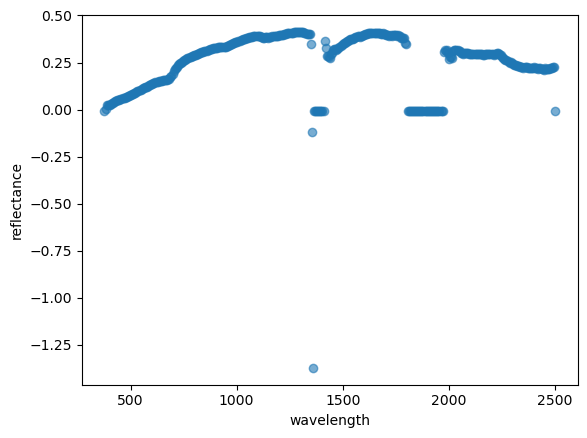

In [7]:
# plot spectra from a pixel
rfl_meas = avirisng.isel(y=300, x=300).values
wl = avirisng.wavelength.values
plt.scatter(wl, rfl_meas, alpha=0.6)
plt.xlabel("wavelength")
plt.ylabel("reflectance")
plt.show()